In [5]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
import joblib

from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [6]:
data1 = pd.read_csv('/Users/suchithkurra/Desktop/Honey_Pot Research/data/DDoS.csv')
data2 = pd.read_csv('/Users/suchithkurra/Desktop/Honey_Pot Research/data/patator.csv')
data3 = pd.read_csv('/Users/suchithkurra/Desktop/Honey_Pot Research/data/infilatration.csv')
data4 = pd.read_csv('/Users/suchithkurra/Desktop/Honey_Pot Research/data/Web_attack.csv')


In [7]:
# Data preprocessing
# Drop any rows with missing values
data1.dropna(inplace=True)
data2.dropna(inplace=True)
data3.dropna(inplace=True)
data4.dropna(inplace=True)

In [8]:
# Replace infinite or very large values with NaN
data1.replace([np.inf, -np.inf], np.nan, inplace=True)
data2.replace([np.inf, -np.inf], np.nan, inplace=True)
data3.replace([np.inf, -np.inf], np.nan, inplace=True)
data4.replace([np.inf, -np.inf], np.nan, inplace=True)

In [9]:
# Drop rows containing NaN values
data1.dropna(inplace=True)
data2.dropna(inplace=True)
data3.dropna(inplace=True)
data4.dropna(inplace=True)

In [16]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable
label_encoder = LabelEncoder()

data1[' Label'] = label_encoder.fit_transform(data1[' Label'])
data2['Label'] = label_encoder.fit_transform(data2['Label'])
data3['Label'] = label_encoder.fit_transform(data3['Label'])
data4['Label'] = label_encoder.fit_transform(data4['Label'])

In [17]:
# Split features and target variable
X = data1.drop(' Label', axis=1)
y = data1[' Label']

A = data2.drop('Label', axis=1)
B = data2['Label']

C = data3.drop('Label', axis=1)
D = data3['Label']

P = data4.drop('Label', axis=1)
Q = data4['Label']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=42)

C_train, C_test, D_train, D_test = train_test_split(C, D, test_size=0.2, random_state=42)

P_train, P_test, Q_train, Q_test = train_test_split(P, Q, test_size=0.2, random_state=42)


In [19]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

A_train_scaled = scaler.fit_transform(A_train)
A_test_scaled = scaler.transform(A_test)

C_train_scaled = scaler.fit_transform(C_train)
C_test_scaled = scaler.transform(C_test)

P_train_scaled = scaler.fit_transform(P_train)
P_test_scaled = scaler.transform(P_test)

In [20]:
# SelectKBest with ANOVA F-value
k = 20  # Number of top features to select
selector1 = SelectKBest(score_func=f_classif, k=k)
selector2 = SelectKBest(score_func=f_classif, k=k)
selector3 = SelectKBest(score_func=f_classif, k=k)
selector4 = SelectKBest(score_func=f_classif, k=k)

X_train_selected = selector1.fit_transform(X_train_scaled, y_train)
X_test_selected = selector1.transform(X_test_scaled)

A_train_selected = selector2.fit_transform(A_train_scaled, B_train)
A_test_selected = selector2.transform(A_test_scaled)

C_train_selected = selector3.fit_transform(C_train_scaled, D_train)
C_test_selected = selector3.transform(C_test_scaled)

P_train_selected = selector4.fit_transform(P_train_scaled, Q_train)
P_test_selected = selector4.transform(P_test_scaled)

In [21]:
selected_features_indices1 = selector1.get_support(indices=True)
selected_features_indices2 = selector2.get_support(indices=True)
selected_features_indices3 = selector3.get_support(indices=True)
selected_features_indices4 = selector4.get_support(indices=True)

In [22]:
selected_feature_names1 = X.columns[selected_features_indices1]
selected_feature_names2 = X.columns[selected_features_indices2]
selected_feature_names3= X.columns[selected_features_indices3]
selected_feature_names4 = X.columns[selected_features_indices4]

In [23]:
# Print the selected feature names
print("Selected features1:")
print(selected_feature_names1)
print("Selected features2:")
print(selected_feature_names2)
print("Selected features3:")
print(selected_feature_names3)
print("Selected features4:")
print(selected_feature_names4)

Selected features1:
Index([' Destination Port', 'Total Length of Fwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Mean',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Bwd IAT Total',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', ' URG Flag Count',
       ' Average Packet Size', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' Subflow Fwd Bytes', ' min_seg_size_forward'],
      dtype='object')
Selected features2:
Index([' Destination Port', ' Fwd Packet Length Min', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Fwd PSH Flags', ' Min Packet Length',
       ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std',
       ' SYN Flag Count', ' PSH Flag Count', ' ACK Flag Count',
       ' URG Flag Count', ' Down/Up Ratio', ' Aver

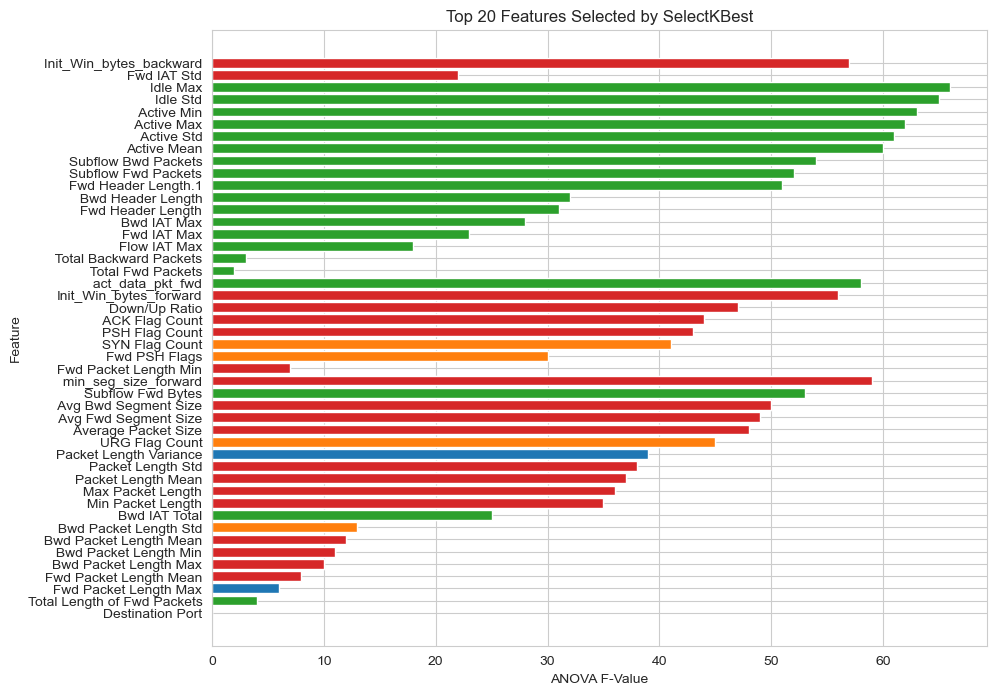

In [41]:
# Plot the selected feature scores
plt.figure(figsize=(10, 8))
plt.barh(selected_feature_names1, selected_features_indices1)
plt.barh(selected_feature_names2, selected_features_indices2)
plt.barh(selected_feature_names3, selected_features_indices3)
plt.barh(selected_feature_names4, selected_features_indices4)
plt.xlabel('ANOVA F-Value')
plt.ylabel('Feature')
plt.title('Top 20 Features Selected by SelectKBest')
plt.show()

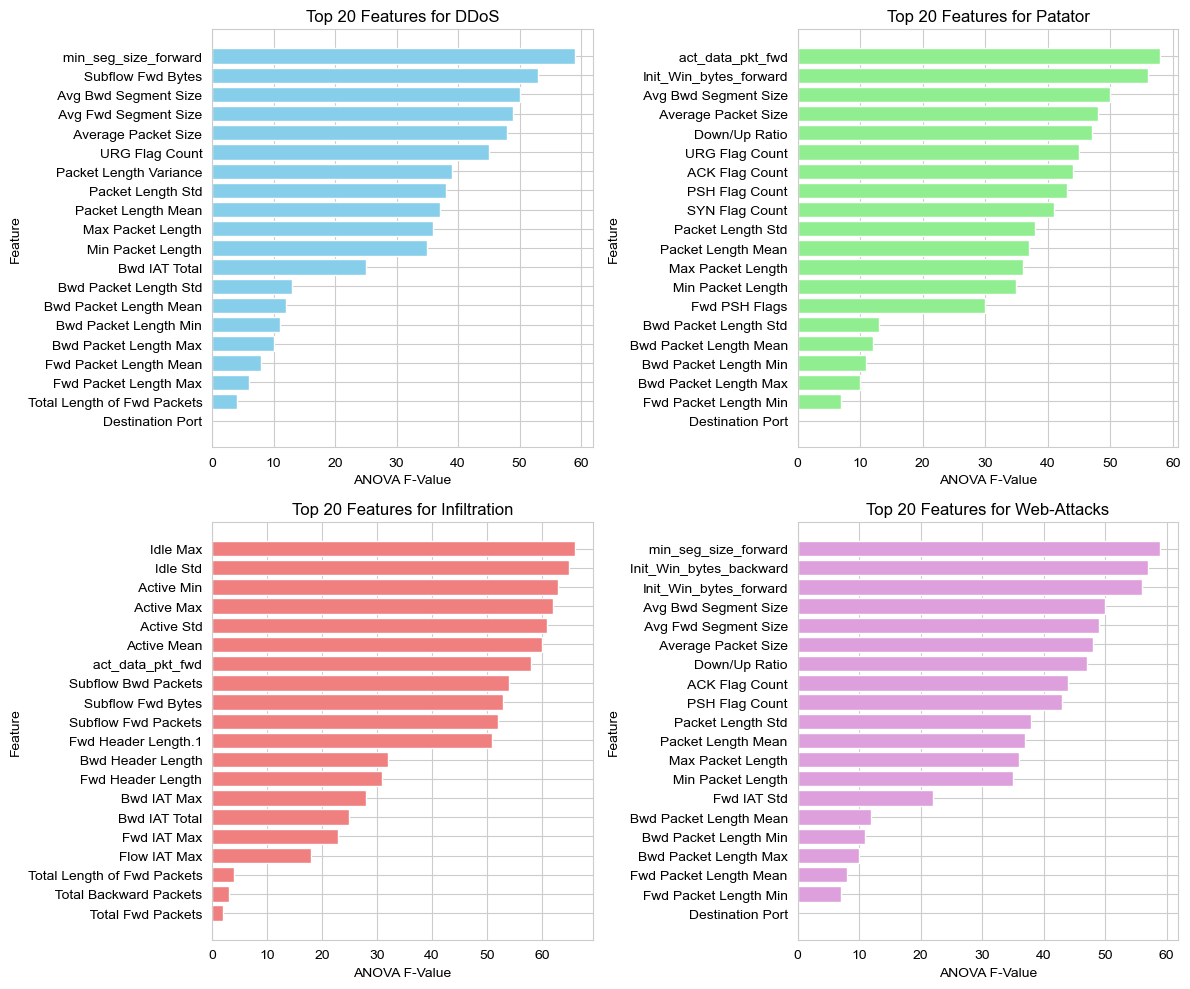

In [40]:
import matplotlib.pyplot as plt

# Assuming selected_feature_names1, selected_feature_names2, selected_feature_names3, selected_feature_names4
# and selected_features_indices1, selected_features_indices2, selected_features_indices3, selected_features_indices4
# are already defined and contain the feature names and scores respectively.

fig, axes = plt.subplots(2, 2, figsize=(12, 10), facecolor='white')
axes = axes.ravel()

# Force the background color for each subplot
for ax in axes:
    ax.set_facecolor('white')
    # Force the facecolor using patch
    ax.patch.set_facecolor('white')

# Plotting each graph in a 2x2 manner
axes[0].barh(selected_feature_names1, selected_features_indices1, color='skyblue')
axes[0].set_title('Top 20 Features for DDoS', color='black')
axes[0].set_xlabel('ANOVA F-Value', color='black')
axes[0].set_ylabel('Feature', color='black')
axes[0].tick_params(axis='x', colors='black')
axes[0].tick_params(axis='y', colors='black')

axes[1].barh(selected_feature_names2, selected_features_indices2, color='lightgreen')
axes[1].set_title('Top 20 Features for Patator', color='black')
axes[1].set_xlabel('ANOVA F-Value', color='black')
axes[1].set_ylabel('Feature', color='black')
axes[1].tick_params(axis='x', colors='black')
axes[1].tick_params(axis='y', colors='black')

axes[2].barh(selected_feature_names3, selected_features_indices3, color='lightcoral')
axes[2].set_title('Top 20 Features for Infiltration', color='black')
axes[2].set_xlabel('ANOVA F-Value', color='black')
axes[2].set_ylabel('Feature', color='black')
axes[2].tick_params(axis='x', colors='black')
axes[2].tick_params(axis='y', colors='black')

axes[3].barh(selected_feature_names4, selected_features_indices4, color='plum')
axes[3].set_title('Top 20 Features for Web-Attacks', color='black')
axes[3].set_xlabel('ANOVA F-Value', color='black')
axes[3].set_ylabel('Feature', color='black')
axes[3].tick_params(axis='x', colors='black')
axes[3].tick_params(axis='y', colors='black')

plt.tight_layout()
plt.show()
